#  Course Recommendation System

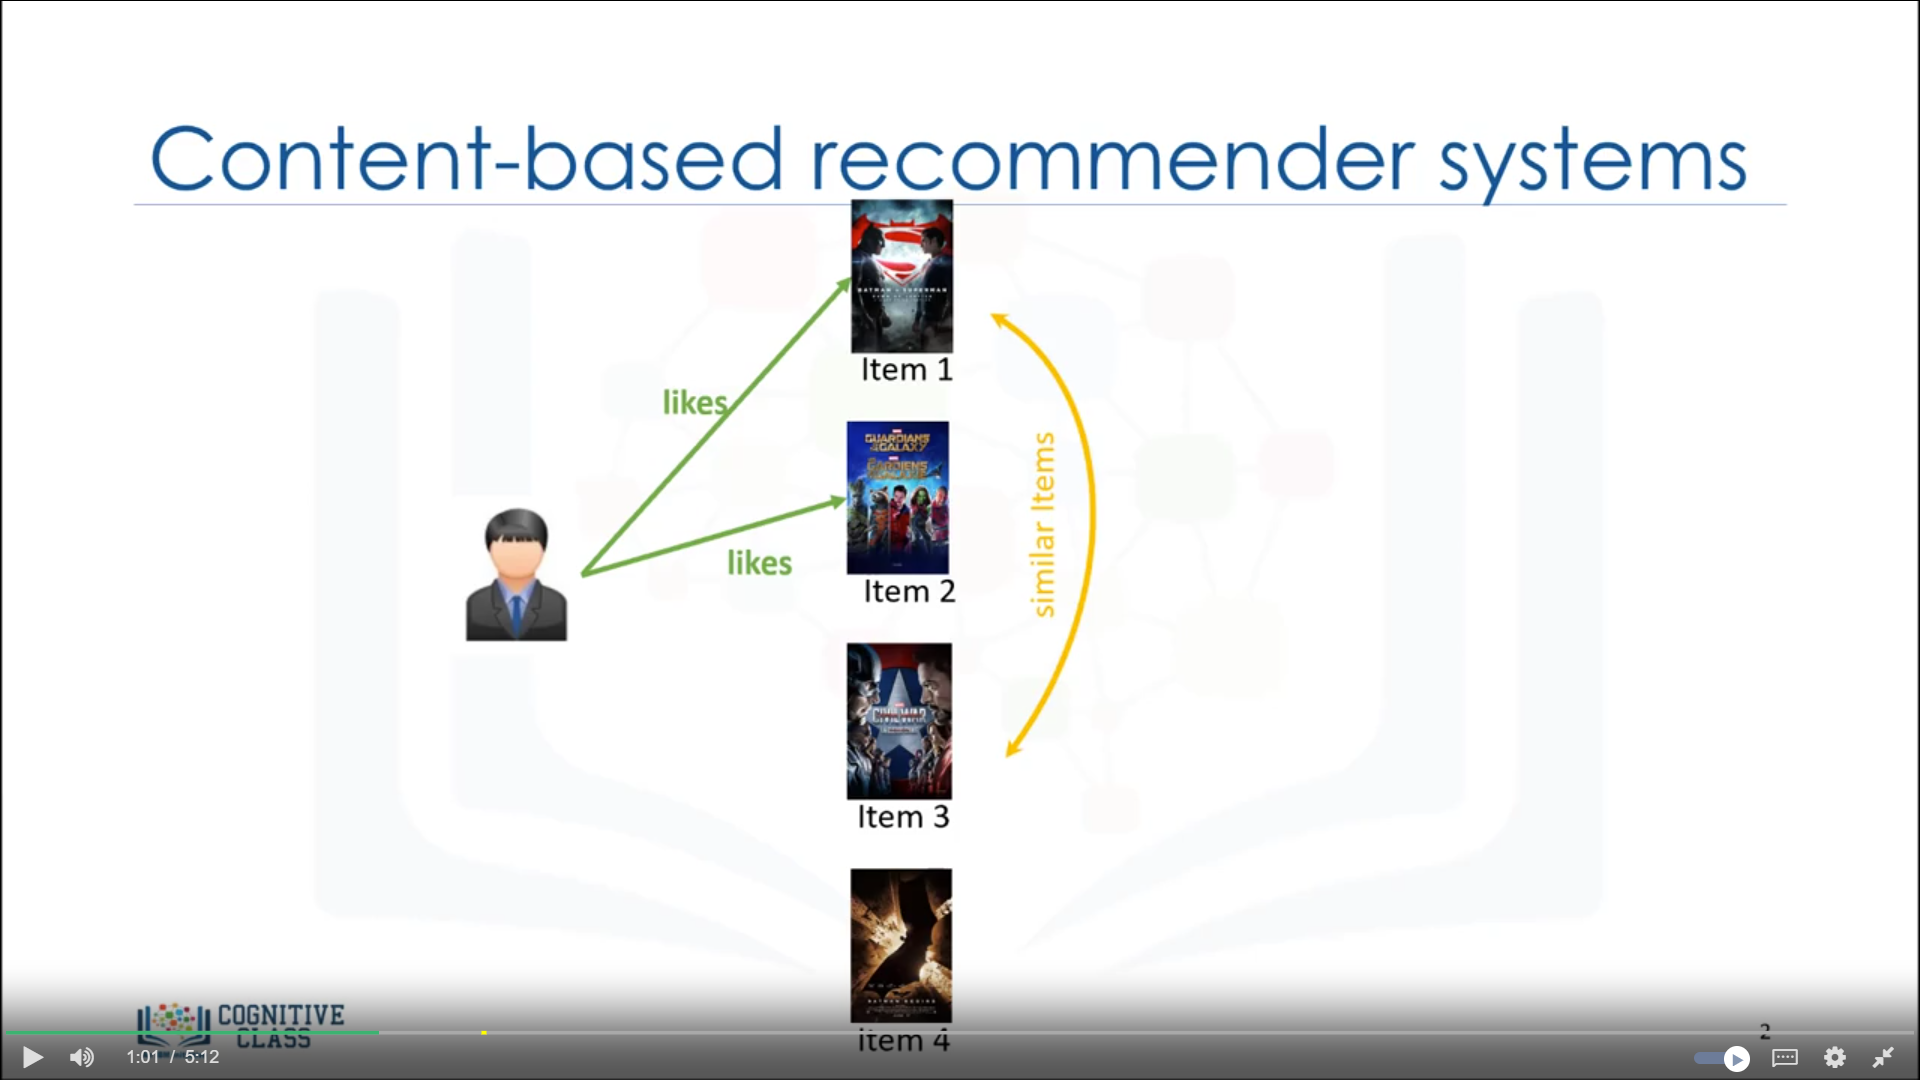

# **Exploratory Data Analysis on Online Course Enrollment Data**


Before we keep our heads down building a cool personalized online courses recommender system, we always need to take a look at data first since it is the essence of any machine learning system. We need to explore what kind of data we will need and what such data would look like.

You have already learned it is important to perform initial investigations on the data and how to perform exploratory data analysis to find preliminary insights such as data patterns and to check assumptions with the help of summary statistics and graphical representations.

Now, let's apply your EDA skills to online courses related datasets such as course titles/genres and course enrollments.

## Prepare and setup the lab environment

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [196]:
# also set a random state
rs = 123

### Load and explore the dataset

Plot a Word Cloud from Course Titles

First, let's join all the title values into one string, then we can conveniently get a wordcloud from the big string:


In [202]:
titles = " ".join(title for title in course_df['TITLE'].astype(str))

In [204]:
titles

'robots are coming  build iot apps with watson  swift  and node red accelerating deep learning with gpu consuming restful services using the reactive jax rs client analyzing big data in r using apache spark containerizing  packaging  and running a spring boot application cloud native security conference  data security data science bootcamp with r for university proffesors learn how to use docker containers for iterative development scorm test course create your first mongodb database testing microservices with the arquillian managed container cloud pak for integration essentials watson analytics for social media data science bootcamp with python for university professors  advance create a cryptocurrency trading algorithm in python data   ai essentials securing java microservices with eclipse microprofile json web token  microprofile jwt  enabling distributed tracing in microservices with zipkin sql access for hadoop hybrid cloud conference  ai pipelines lab dataops methodology data   a

We also want to filter common stop words and some less meaningful words:

In [207]:
# English Stopwords
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])

Then, we create a ```WordCloud``` object and generate ```wordcloud``` from the titles.

In [212]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400)

In [214]:
wordcloud.generate(titles)

We can use `plt.imshow()` method to visualize the generated wordcloud:


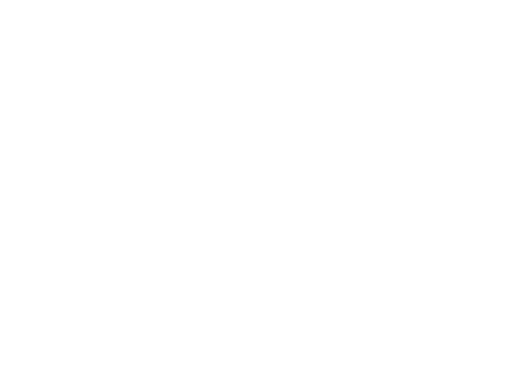

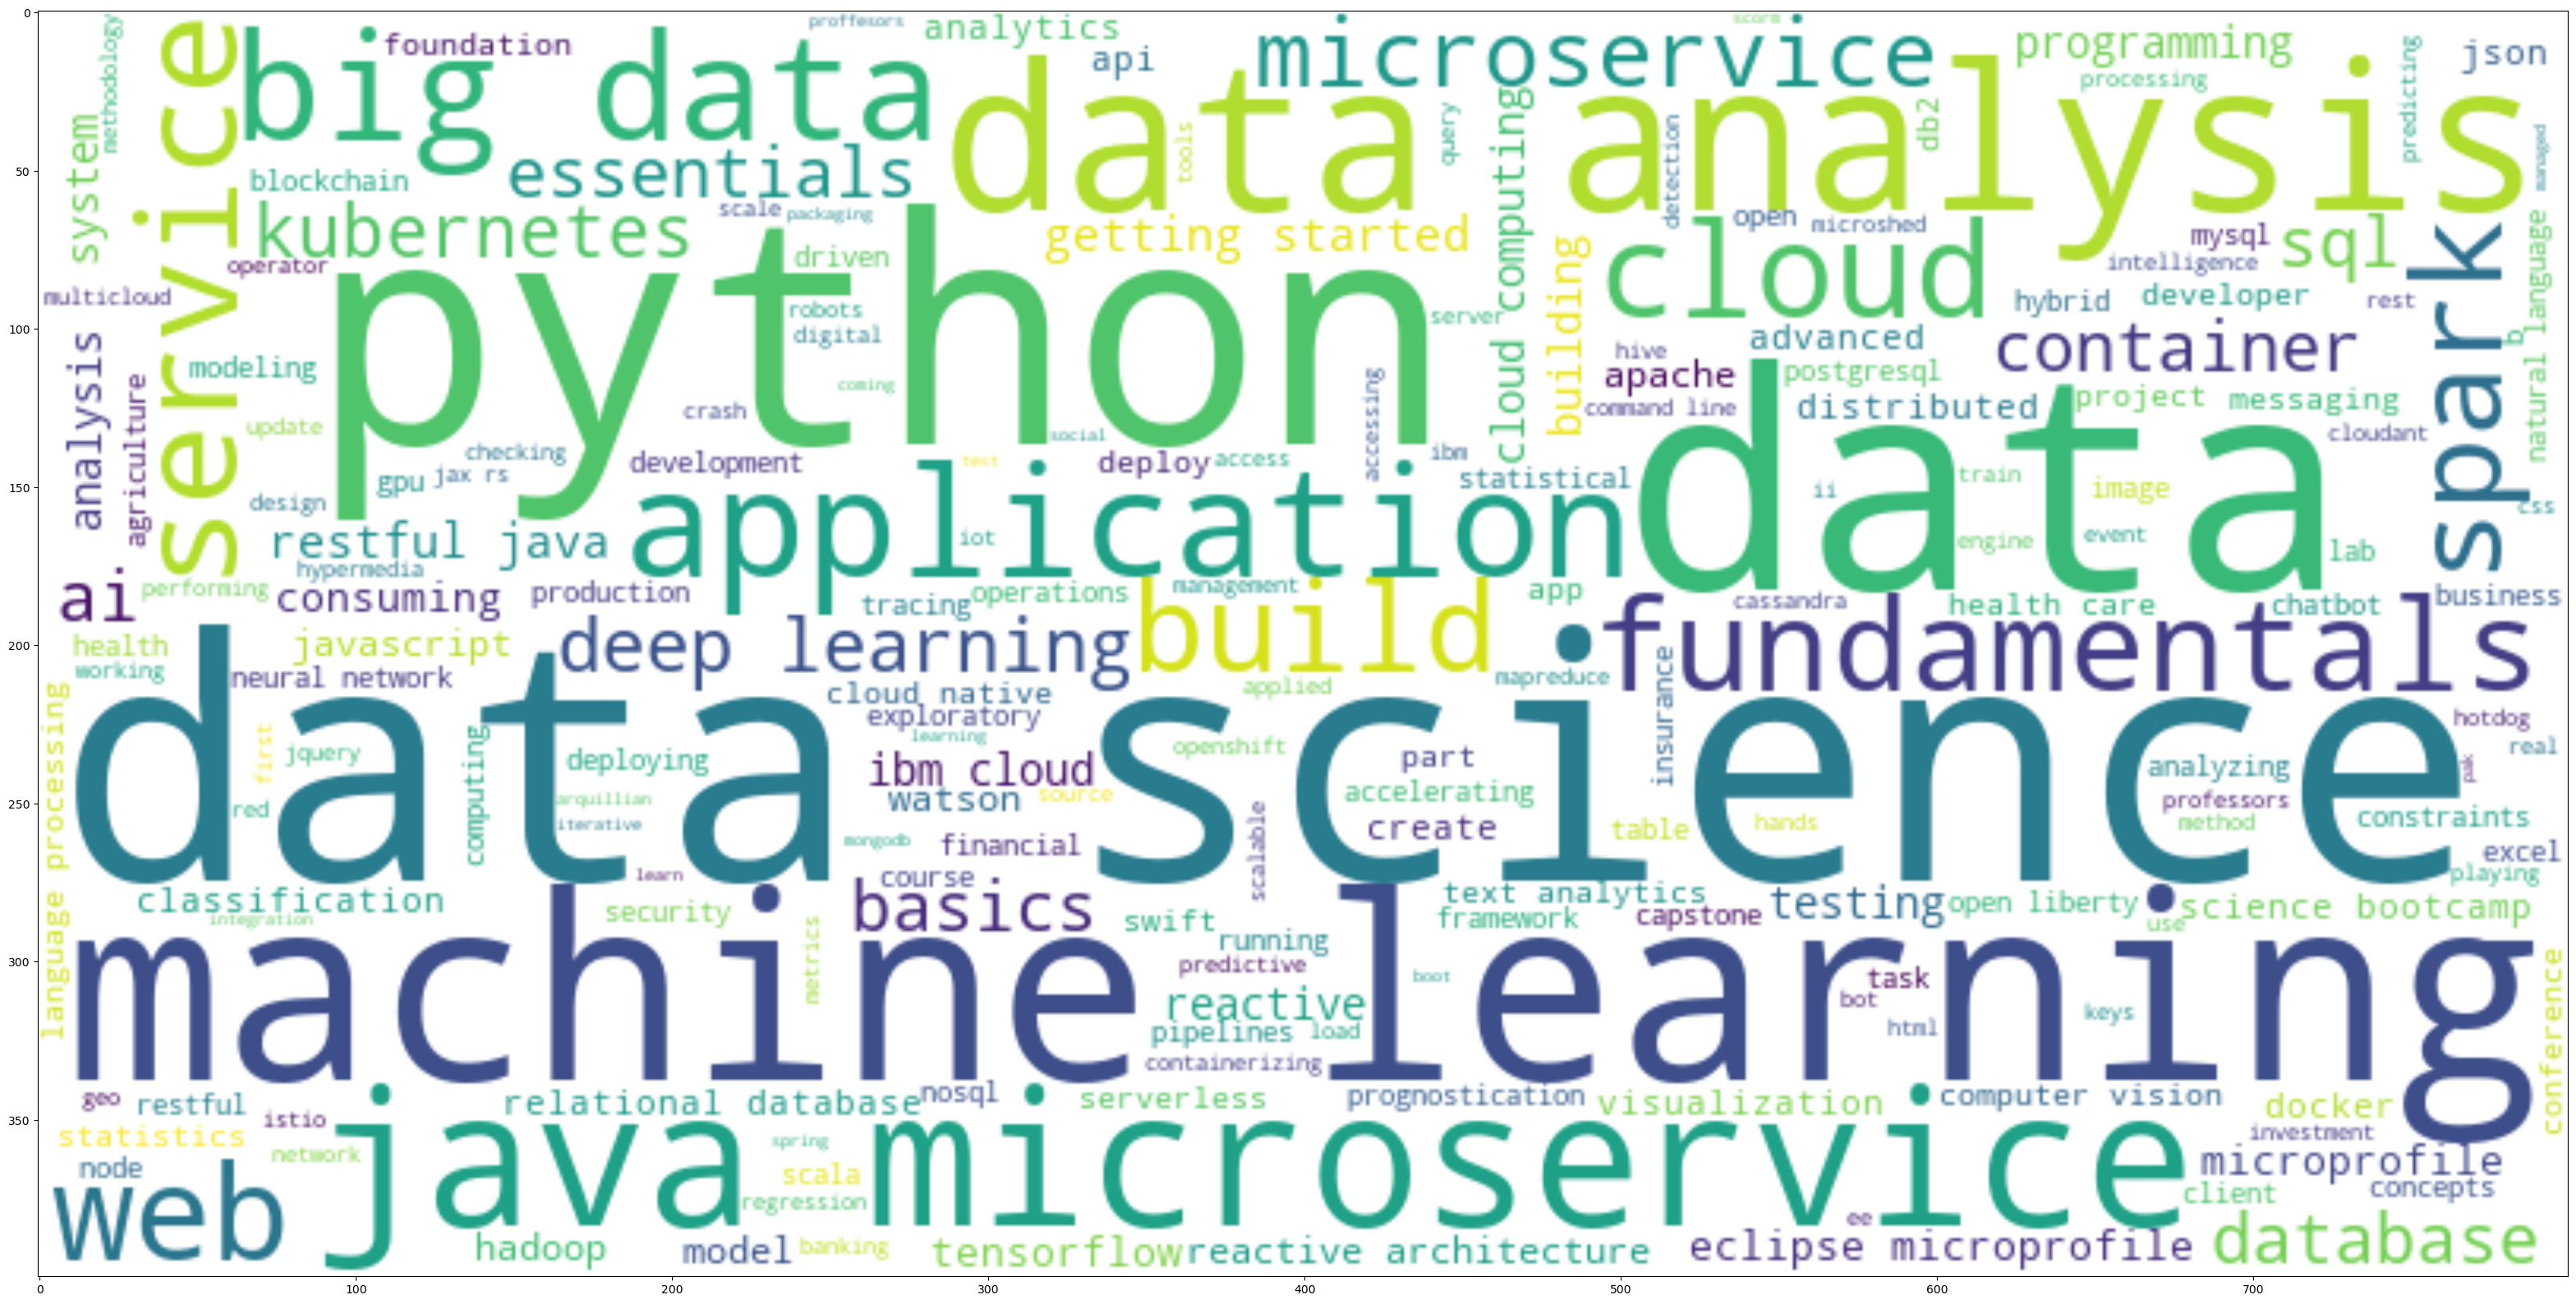

In [217]:

plt.axis("off")

plt.figure(figsize=(40,20))

plt.tight_layout(pad=0)

plt.imshow(wordcloud, interpolation='bilinear')

plt.show()

As we can see from the ```wordcloud```,  there are many popular IT related keywords such as python, data science, machine learning, big data, ai, tensorflow, container, cloud, etc. By looking at these keywords, we should have a general understanding that the courses in the dataset are focused on demanding IT skills.


Next, you need to perform some more detailed analysis on the course dataset.


### TASK: Analyze Course Genres


First, you can try to find out which courses may be of interest you. For example, what are the all machine learning related courses?


_TODO: Find all courses with genre `MachineLearning` == 1_


In [226]:
ml_courses_df = course_df[course_df['MachineLearning'] == 1]
ml_courses = ml_courses_df[['COURSE_ID', 'TITLE']]
ml_courses_df

COURSE_ID                                              TITLE  Database  \
1      ML0122EN                accelerating deep learning with gpu         0   
15     DAI101EN                               data   ai essentials         0   
19     HCC105EN          hybrid cloud conference  ai pipelines lab         0   
21     DS0132EN                  data   ai  jumpstart your journey         0   
24     BENTEST4                 ai for everyone  master the basics         0   
..          ...                                                ...       ...   
274  excourse61        convolutional neural networks in tensorflow         0   
282  excourse69                     machine learning with big data         0   
290  excourse77  natural language processing with attention models         0   
291  excourse78   natural language processing with sequence models         0   
292  excourse79  natural language processing with probabilistic...         0   

     Python  CloudComputing  DataAnalysis  Containers  MachineLearning  \
1         1               0             0           0                1   
15        0               0             0           0                1   
19        0               0             0           0                1   
21        0               0             0           0                1   
24        0               0             0           0                1   
..      ...             ...           ...         ...              ...   
274       0               0             0           0                1   
282       0               0             0           0                1   
290       0               0             0           0                1   
291       0               0             0           0                1   
292       0               0             0           0                1   

     ComputerVision  DataScience  BigData  Chatbot  R  BackendDev  \
1                 0            1        0        0  0           0   
15                0            0        0        0  0           0   
19                0            0        0        0  0           0   
21                0            0        0        0  0           0   
24                0            0        0        0  0           0   
..              ...          ...      ...      ... ..         ...   
274               1            0        0        0  0           0   
282               0            0        1        0  0           0   
290               0            0        0        0  0           0   
291               0            0        0        0  0           0   
292               0            0        0        0  0           0   

     FrontendDev  Blockchain  
1              0           0  
15             0           0  
19             0           0  
21             0           0  
24             0           0  
..           ...         ...  
274            0           0  
282            0           0  
290            0           0  
291            0           0  
292            0           0  

[69 rows x 16 columns]

Similarly, you can try to find out what are the scalable machine learning courses?


In [229]:

ml_bigdata_courses_df = course_df[(course_df['MachineLearning'] == 1) & (course_df['BigData'] == 1)]

ml_bigdata_courses = ml_bigdata_courses_df[['COURSE_ID', 'TITLE']]

print(ml_bigdata_courses)

      COURSE_ID                                              TITLE
46   GPXX0BUBEN  insurance risk assessment with montecarlo meth...
59     TA0106EN                            text analytics at scale
184    BD0221EN                                        spark mllib
282  excourse69                     machine learning with big data


In [231]:
genres = course_df.columns[2:]
genres

Index(['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers',
       'MachineLearning', 'ComputerVision', 'DataScience', 'BigData',
       'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')

Given all the course genres, now let's calculate the course count for each genre. e.g., there are 69 courses that belong to the `MachineLearning` genre and 23 courses that belong to the `Python` genre. We also want to sort the genre count list to find the most popular course genres.


In [234]:

genre_columns_df = course_df.drop(columns=['COURSE_ID', 'TITLE'])


genre_counts = genre_columns_df.sum()


sorted_genre_counts = genre_counts.sort_values(ascending=False)


print(sorted_genre_counts)

BackendDev         78
MachineLearning    69
Database           60
DataAnalysis       56
DataScience        38
CloudComputing     37
BigData            36
Python             28
FrontendDev        19
Containers         17
R                  17
ComputerVision     10
Chatbot             4
Blockchain          4
dtype: int64


In [236]:

genre_columns_df = course_df.drop(columns=['COURSE_ID', 'TITLE'])


genre_counts = genre_columns_df.sum()


sorted_genre_counts = genre_counts.sort_values(ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_genre_counts.index, y=sorted_genre_counts.values, palette="viridis")


plt.xticks(rotation=90)  
plt.xlabel('Course Genre')
plt.ylabel('Course Count')
plt.title('Course Genre Counts')
plt.tight_layout()


plt.show()

C:\Users\haris\AppData\Local\Temp\ipykernel_6720\2422775247.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_genre_counts.index, y=sorted_genre_counts.values, palette="viridis")


# **Content-based Course Recommender System Using User Profile and Course Genres**


The most common type of content-based recommendation system is to recommend items to users based on their profiles. The user's profile revolves around that user's preferences and tastes. It is shaped based on user ratings, including the number of times a user has clicked on different items or liked those items.

The recommendation process is based on the similarity between those items. The similarity or closeness of items is measured based on the similarity in the content of those items. When we say content, we're talking about things like the item's category, tag, genre, and so on. Essentially the features about an item.


For online course recommender systems, we already know how to extract features from courses (such as genres or BoW features). Next, based on the course genres and users' ratings, we want to further build user profiles (if unknown). 

A user profile can be seen as the user feature vector that mathematically represents a user's learning interests.


With the user profile feature vectors and course genre feature vectors constructed, we can use several computational methods, such as a simple dot product, to compute or predict an interest score for each course and recommend those courses with high interest scores.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/module_3/images/user_profile_score.png)


* Generate a user profile based on course genres and rating
* Generate course recommendations based on a user's profile and course genres


----


## Prepare and setup the lab environment


First, let's install and import the required packages.


In [184]:
%pip install scikit-learn
%pip install pandas

In [6]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [7]:
# also set a random state
rs = 123

### Generate course recommendations based on user profile and course genre vectors


By now you have learned how to calculate recommendation scores using a user profile vector and a course genre vector.  Now, let's work on some real-world datasets to generate real personalized courses recommendations.


First, we will load a user's profile dataframe and a course genre dataframe:


In [11]:
course_df= pd.read_csv("F:\\Capstone_project\\course_genre.csv")

In [15]:
course_df.head()

COURSE_ID                                              TITLE  Database  \
0    ML0201EN  robots are coming  build iot apps with watson ...         0   
1    ML0122EN                accelerating deep learning with gpu         0   
2  GPXX0ZG0EN  consuming restful services using the reactive ...         0   
3    RP0105EN         analyzing big data in r using apache spark         1   
4  GPXX0Z2PEN  containerizing  packaging  and running a sprin...         0   

   Python  CloudComputing  DataAnalysis  Containers  MachineLearning  \
0       0               0             0           0                0   
1       1               0             0           0                1   
2       0               0             0           0                0   
3       0               0             1           0                0   
4       0               0             0           1                0   

   ComputerVision  DataScience  BigData  Chatbot  R  BackendDev  FrontendDev  \
0               0            0        0        0  0           1            1   
1               0            1        0        0  0           0            0   
2               0            0        0        0  0           1            1   
3               0            0        1        0  1           0            0   
4               0            0        0        0  0           1            0   

   Blockchain  
0           0  
1           0  
2           0  
3           0  
4           0

In [21]:
profile_df =pd.read_csv("F:\\Capstone_project\\user_profile.csv")

In [23]:
profile_df.head()

user  Database  Python  CloudComputing  DataAnalysis  Containers  \
0     2      52.0    14.0             6.0          43.0         3.0   
1     4      40.0     2.0             4.0          28.0         0.0   
2     5      24.0     8.0            18.0          24.0         0.0   
3     7       2.0     0.0             0.0           2.0         0.0   
4     8       6.0     0.0             0.0           4.0         0.0   

   MachineLearning  ComputerVision  DataScience  BigData  Chatbot     R  \
0             33.0             0.0         29.0     41.0      2.0  18.0   
1             14.0             0.0         20.0     24.0      0.0   6.0   
2             30.0             0.0         22.0     14.0      2.0  14.0   
3              0.0             0.0          0.0      2.0      0.0   0.0   
4              0.0             0.0          0.0      6.0      0.0   2.0   

   BackendDev  FrontendDev  Blockchain  
0        34.0          9.0         6.0  
1         6.0          0.0         2.0  
2        26.0          4.0         6.0  
3         0.0          0.0         0.0  
4         0.0          0.0         0.0

The profile dataframe contains the course interests for each user, for example, user 8 is very interested in R, data analysis, database, and big data:


In [25]:
profile_df[profile_df['user'] == 8]

user  Database  Python  CloudComputing  DataAnalysis  Containers  \
4     8       6.0     0.0             0.0           4.0         0.0   

   MachineLearning  ComputerVision  DataScience  BigData  Chatbot    R  \
4              0.0             0.0          0.0      6.0      0.0  2.0   

   BackendDev  FrontendDev  Blockchain  
4         0.0          0.0         0.0

In [29]:
test_df = pd.read_csv("F:\\Capstone_project\\ratings.csv")

In [33]:
test_df.head()

user        item  rating
0  1889878    CC0101EN       5
1  1342067    CL0101EN       3
2  1990814  ML0120ENv3       5
3   380098    BD0211EN       5
4   779563    DS0101EN       3

Let's look at how many test users we have in the dataset.


In [35]:
# Group the test users DataFrame by the 'user' column and find the maximum value for each group,
# then reset the index and drop the old index to obtain a DataFrame with unique user IDs
test_users = test_df.groupby(['user']).max().reset_index(drop=False)

# Extract the 'user' column from the test_users DataFrame and convert it to a list of user IDs
test_user_ids = test_users['user'].to_list()

# Print the total number of test users by obtaining the length of the test_user_ids list
print(f"Total numbers of test users {len(test_user_ids)}")


Total numbers of test users 33901


Then for each test user in the test dataset, you need to first find out which courses are unknown/unselected to them. For example, suppose we have a user `1078030` with profile:


In [37]:
test_user_profile = profile_df[profile_df['user'] == 1078030]
test_user_profile

user  Database  Python  CloudComputing  DataAnalysis  Containers  \
18204  1078030       0.0    12.0             0.0           9.0         0.0   

       MachineLearning  ComputerVision  DataScience  BigData  Chatbot    R  \
18204             12.0             0.0          6.0      0.0      0.0  0.0   

       BackendDev  FrontendDev  Blockchain  
18204         0.0          0.0         0.0

In [39]:
# Now let's get the test user vector by excluding the `user` column
test_user_vector = test_user_profile.iloc[0, 1:].values
test_user_vector

array([ 0., 12.,  0.,  9.,  0., 12.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,
        0.])

We can first find their enrolled courses in `test_users_df`:


In [165]:
enrolled_courses = test_df[test_df['user'] == 1078030]['item'].to_list()
enrolled_courses = set(enrolled_courses)

In [167]:
enrolled_courses

{'DA0101EN',
 'DV0101EN',
 'ML0101ENv3',
 'ML0115EN',
 'ML0120ENv2',
 'ML0122ENv1',
 'PY0101EN',
 'ST0101EN'}

We then print the entire course list:


In [169]:
all_courses = set(course_df['COURSE_ID'].values)
all_courses 

{'AI0111EN',
 'BC0101EN',
 'BC0201EN',
 'BC0202EN',
 'BD0101EN',
 'BD0111EN',
 'BD0115EN',
 'BD0121EN',
 'BD0123EN',
 'BD0131EN',
 'BD0133EN',
 'BD0135EN',
 'BD0137EN',
 'BD0141EN',
 'BD0143EN',
 'BD0145EN',
 'BD0151EN',
 'BD0153EN',
 'BD0211EN',
 'BD0212EN',
 'BD0221EN',
 'BD0223EN',
 'BENTEST4',
 'CB0101EN',
 'CB0103EN',
 'CB0105ENv1',
 'CB0201EN',
 'CC0101EN',
 'CC0103EN',
 'CC0120EN',
 'CC0121EN',
 'CC0150EN',
 'CC0201EN',
 'CC0210EN',
 'CC0250EN',
 'CC0271EN',
 'CL0101EN',
 'CNSC02EN',
 'CO0101EN',
 'CO0193EN',
 'CO0201EN',
 'CO0301EN',
 'CO0302EN',
 'CO0401EN',
 'COM001EN',
 'CP0101EN',
 'DA0101EN',
 'DA0151EN',
 'DA0201EN',
 'DAI101EN',
 'DB0101EN',
 'DB0111EN',
 'DB0113EN',
 'DB0115EN',
 'DB0151EN',
 'DE0205EN',
 'DJ0101EN',
 'DP0101EN',
 'DS0101EN',
 'DS0103EN',
 'DS0105EN',
 'DS0107',
 'DS0110EN',
 'DS0132EN',
 'DS0201EN',
 'DS0301EN',
 'DS0321EN',
 'DV0101EN',
 'DV0151EN',
 'DW0101EN',
 'DX0106EN',
 'DX0107EN',
 'DX0108EN',
 'EE0101EN',
 'GPXX01AVEN',
 'GPXX01DCEN',
 'GPXX01

Then we can use all courses to subtract the enrolled courses to get a set of all unknown courses for user `1078030`, and we want to find potential interested courses hidden in the unknown course list.


In [53]:
unknown_courses = all_courses.difference(enrolled_courses)
unknown_courses

{'AI0111EN',
 'BC0101EN',
 'BC0201EN',
 'BC0202EN',
 'BD0101EN',
 'BD0111EN',
 'BD0115EN',
 'BD0121EN',
 'BD0123EN',
 'BD0131EN',
 'BD0133EN',
 'BD0135EN',
 'BD0137EN',
 'BD0141EN',
 'BD0143EN',
 'BD0145EN',
 'BD0151EN',
 'BD0153EN',
 'BD0211EN',
 'BD0212EN',
 'BD0221EN',
 'BD0223EN',
 'BENTEST4',
 'CB0101EN',
 'CB0103EN',
 'CB0105ENv1',
 'CB0201EN',
 'CC0101EN',
 'CC0103EN',
 'CC0120EN',
 'CC0121EN',
 'CC0150EN',
 'CC0201EN',
 'CC0210EN',
 'CC0250EN',
 'CC0271EN',
 'CL0101EN',
 'CNSC02EN',
 'CO0101EN',
 'CO0193EN',
 'CO0201EN',
 'CO0301EN',
 'CO0302EN',
 'CO0401EN',
 'COM001EN',
 'CP0101EN',
 'DA0151EN',
 'DA0201EN',
 'DAI101EN',
 'DB0101EN',
 'DB0111EN',
 'DB0113EN',
 'DB0115EN',
 'DB0151EN',
 'DE0205EN',
 'DJ0101EN',
 'DP0101EN',
 'DS0101EN',
 'DS0103EN',
 'DS0105EN',
 'DS0107',
 'DS0110EN',
 'DS0132EN',
 'DS0201EN',
 'DS0301EN',
 'DS0321EN',
 'DV0151EN',
 'DW0101EN',
 'DX0106EN',
 'DX0107EN',
 'DX0108EN',
 'EE0101EN',
 'GPXX01AVEN',
 'GPXX01DCEN',
 'GPXX01RYEN',
 'GPXX03HFEN',
 'GP

We can get the genre vectors for those unknown courses as well:


In [171]:
unknown_course_genres = course_df[course_df['COURSE_ID'].isin(unknown_courses)]
# Now let's get the course matrix by excluding `COURSE_ID` and `TITLE` columns:
course_matrix = unknown_course_genres.iloc[:, 2:].values
course_matrix

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0]], dtype=int64)

Given the user profile vector for user `1078030`  and all the unseen course genres vectors above, you can use the dot product to calculate the recommendation score for each unknown course. e.g., the recommendation score for course `accelerating deep learning with gpu` is:


In [59]:
score = np.dot(course_matrix[1], test_user_vector)
score

30.0

Later, we will need to choose a recommendation score threshold. If the score of any course is above the threshold, we may recommend that course to the user.


The workflow can be summarized in the following flowchart:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/module_3/images/recommend_courses.png)


Next, let's calculate the recommendation scores of all courses for all the 1000 test users. 


In [173]:
# Reload the test users dataset from the specified URL using pandas and store it in test_users_df
test_df = pd.read_csv("F:\\Capstone_project\\ratings.csv")

# Reload the user profiles dataset from the specified URL containing user profiles and their associated genres using pandas and store it in profile_df
profile_df = pd.read_csv("F:\\Capstone_project\\user_profile.csv")

# Reload the course genres dataset from the specified URL containing course genres using pandas and store it in course_genres_df
course_df = pd.read_csv("F:\\Capstone_project\\course_genre.csv")

# Create an empty dictionary to store the results of the recommendation process
res_dict = {}


We only want to recommend courses with very high scores so we may set a score threshold to filter out those courses with low scores.


In [69]:
# Only keep the score larger than the recommendation threshold
# The threshold can be fine-tuned to adjust the size of generated recommendations
score_threshold = 10.0

We defined a function called `generate_recommendation_scores()` to compute the recommendation scores of all the unknown courses for all test users.


_TODO: Complete the generate_recommendation_scores() function blow to generate recommendation score for all users. You may also implement the task with different solutions._


In [82]:
def generate_recommendation_scores():
    """
    Generate recommendation scores for users and courses.

    Returns:
    users (list): List of user IDs.
    courses (list): List of recommended course IDs.
    scores (list): List of recommendation scores.
    """

    users = []      # List to store user IDs
    courses = []    # List to store recommended course IDs
    scores = []     # List to store recommendation scores

    # Iterate over each user ID in the test_user_ids list
    for user_id in test_user_ids:
        # Get the user profile data for the current user
        test_user_profile = profile_df[profile_df['user'] == user_id]

        # Get the user vector for the current user id (replace with your method to obtain the user vector)
        test_user_vector = test_user_profile.iloc[0, 1:].values

        # Get the known course ids for the current user
        enrolled_courses = test_df[test_df['user'] == user_id]['item'].to_list()

        # Calculate the unknown course ids
        unknown_courses = all_courses.difference(enrolled_courses)

        # Filter the course_genres_df to include only unknown courses
        unknown_course_df = course_df[course_df['COURSE_ID'].isin(unknown_courses)]
        unknown_course_ids = unknown_course_df['COURSE_ID'].values

        # Calculate the recommendation scores using dot product
        recommendation_scores = np.dot(unknown_course_df.iloc[:, 2:].values, test_user_vector)

        # Append the results into the users, courses, and scores list
        for i in range(0, len(unknown_course_ids)):
            score = recommendation_scores[i]

            # Only keep the courses with high recommendation score
            if score >= score_threshold:
                users.append(user_id)
                courses.append(unknown_course_ids[i])
                scores.append(recommendation_scores[i])

    return users, courses, scores

users, courses, scores = generate_recommendation_scores()
print("Recommendation Scores:")

Recommendation Scores:


After you have completed the function `generate_recommendation_scores()` above, you can test it and generate recommendation scores and save the courses recommendations into a dataframe with three columns: `USER`, `COURSE_ID`, `SCORE`:


In [81]:
# Call the generate_recommendation_scores function to obtain recommendation scores for users and courses,
# and assign the returned lists to variables users, courses, and scores
users, courses, scores = generate_recommendation_scores()

# Create an empty dictionary named res_dict to store the results of the recommendation process
res_dict = {}

# Store the lists of users, courses, and scores into the res_dict dictionary with corresponding keys
res_dict['USER'] = users
res_dict['COURSE_ID'] = courses
res_dict['SCORE'] = scores

# Create a DataFrame named res_df using the res_dict dictionary, specifying the column order as ['USER', 'COURSE_ID', 'SCORE']
res_df = pd.DataFrame(res_dict, columns=['USER', 'COURSE_ID', 'SCORE'])

# Save the res_df DataFrame to a CSV file named "profile_rs_results.csv" without including the index
res_df.to_csv("profile_rs_results.csv", index=False)

# Output the res_df DataFrame
res_df


USER   COURSE_ID  SCORE
0              2    ML0201EN   43.0
1              2  GPXX0ZG0EN   43.0
2              2  GPXX0Z2PEN   37.0
3              2    DX0106EN   47.0
4              2  GPXX06RFEN   52.0
...          ...         ...    ...
1500419  2102680  excourse62   15.0
1500420  2102680  excourse69   14.0
1500421  2102680  excourse77   14.0
1500422  2102680  excourse78   14.0
1500423  2102680  excourse79   14.0

[1500424 rows x 3 columns]

# Evaluation metrics

In [251]:
from collections import defaultdict
# Sample data
user_profile_data = {
    'user1': {'Database': 1, 'Python': 1, 'CloudComputing': 0, 'DataAnalysis': 1, 'Containers': 0, 'MachineLearning': 1, 'ComputerVision': 0, 'DataScience': 1, 'BigData': 0, 'Chatbot': 0, 'R': 1, 'BackendDev': 0, 'FrontendDev': 0, 'Blockchain': 0},
    'user2': {'Database': 1, 'Python': 0, 'CloudComputing': 1, 'DataAnalysis': 1, 'Containers': 0, 'MachineLearning': 1, 'ComputerVision': 0, 'DataScience': 0, 'BigData': 1, 'Chatbot': 0, 'R': 1, 'BackendDev': 0, 'FrontendDev': 0, 'Blockchain': 1}
}
course_genre_data = {
    'course1': {'Database': 1, 'Python': 0, 'CloudComputing': 1, 'DataAnalysis': 1, 'Containers': 0, 'MachineLearning': 1, 'ComputerVision': 0, 'DataScience': 0, 'BigData': 1, 'Chatbot': 1, 'R': 0, 'BackendDev': 0, 'FrontendDev': 0, 'Blockchain': 1},
    'course2': {'Database': 0, 'Python': 1, 'CloudComputing': 0, 'DataAnalysis': 1, 'Containers': 1, 'MachineLearning': 0, 'ComputerVision': 1, 'DataScience': 0, 'BigData': 1, 'Chatbot': 0, 'R': 1, 'BackendDev': 0, 'FrontendDev': 0, 'Blockchain': 1}
}
test_data = {
    'user': ['user1', 'user1', 'user2', 'user2'],
    'item': ['course1', 'course2', 'course1', 'course2'],
    'rating': [1, 0, 1, 1]
}
def precision_recall_f1(test_data, user_profile_data, course_genre_data):
    precision_sum = 0
    recall_sum = 0
    f1_score_sum = 0
    for user, item, rating in zip(test_data['user'], test_data['item'], test_data['rating']):
        if user in user_profile_data:
            relevant_courses = [key for key, val in user_profile_data[user].items() if val == 1]
            recommended_genres = [key for key, val in course_genre_data[item].items() if val == 1]
            true_positives = len(set(relevant_courses) & set(recommended_genres))
            precision = true_positives / len(recommended_genres) if len(recommended_genres) > 0 else 0
            recall = true_positives / len(relevant_courses) if len(relevant_courses) > 0 else 0
            precision_sum += precision
            recall_sum += recall
            f1_score_sum += 2 * ((precision * recall) / (precision + recall)) if (precision + recall) > 0 else 0
    precision_avg = precision_sum / len(test_data['user'])
    recall_avg = recall_sum / len(test_data['user'])
    f1_score_avg = f1_score_sum / len(test_data['user'])
    return precision_avg, recall_avg, f1_score_avg
def diversity_metrics(test_data, course_genre_data):
    unique_genres_per_user = defaultdict(set)
    total_unique_genres = set()
    for user, item, rating in zip(test_data['user'], test_data['item'], test_data['rating']):
        recommended_genres = [key for key, val in course_genre_data[item].items() if val == 1]
        unique_genres_per_user[user].update(recommended_genres)
        total_unique_genres.update(recommended_genres)
    intra_list_diversity = {user: len(genres) / len(test_data['item']) for user, genres in unique_genres_per_user.items()}
    inter_list_diversity = len(total_unique_genres) / len(test_data['item'])
    return intra_list_diversity, inter_list_diversity
def novelty(test_data, user_profile_data, course_genre_data):
    novelty_scores = []
    for user, item, rating in zip(test_data['user'], test_data['item'], test_data['rating']):
        if user in user_profile_data:
            relevant_courses = [key for key, val in user_profile_data[user].items() if val == 1]
            recommended_genres = [key for key, val in course_genre_data[item].items() if val == 1]
            novel_courses = [course for course in recommended_genres if course not in relevant_courses]
            novelty_score = len(novel_courses) / len(recommended_genres) if len(recommended_genres) > 0 else 0
            novelty_scores.append(novelty_score)
    return sum(novelty_scores) / len(test_data['user'])
def coverage(test_data, course_genre_data):
    unique_recommendations = set(test_data['item'])
    total_unique_courses = set(course_genre_data.keys())
    coverage_score = len(unique_recommendations) / len(total_unique_courses) if len(total_unique_courses) > 0 else 0
    return coverage_score
def click_through_rate(test_data):
    num_clicks = sum(test_data['rating'])
    ctr = num_clicks / len(test_data['user'])
    return ctr
# Compute evaluation metrics
precision, recall, f1_score = precision_recall_f1(test_data, user_profile_data, course_genre_data)
intra_list_diversity, inter_list_diversity = diversity_metrics(test_data, course_genre_data)
novelty_score = novelty(test_data, user_profile_data, course_genre_data)
coverage_score = coverage(test_data, course_genre_data)
ctr = click_through_rate(test_data)
# Print results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Intra-list Diversity:", intra_list_diversity)
print("Inter-list Diversity:", inter_list_diversity)
print("Novelty Score:", novelty_score)
print("Coverage Score:", coverage_score)
print("Click-through Rate:", ctr)

Precision: 0.5714285714285714
Recall: 0.6071428571428572
F1 Score: 0.5879120879120878
Intra-list Diversity: {'user1': 2.75, 'user2': 2.75}
Inter-list Diversity: 2.75
Novelty Score: 0.42857142857142855
Coverage Score: 1.0
Click-through Rate: 0.75


The recommendation system demonstrates moderate precision, recall, and F1 score, showing that while it is reasonably effective, there’s potential for improving recommendation accuracy and relevance.

```toggle## Change Log
```


```toggle|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
```
```toggle|-|-|-|-|
```
```toggle|2021-10-25|1.0|Yan|Created the initial version|
```
